# Preprocesamiento de las imagenes para el entrenamiento del clasificador

### Recortar las imagenes para que sean cuadradas
Se usa opencv para recortar las imagenes y que tenga las mismas dimensiones (alto, ancho) esto para que cuando se redimensionen no se altere el patron dentro de las mismas.

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Funcion que recorre un directorio hasta cierto nivel

In [2]:
import os

def walklevel(some_dir, level=1):
    some_dir = some_dir.rstrip(os.path.sep)
    assert os.path.isdir(some_dir)
    num_sep = some_dir.count(os.path.sep)
    for root, dirs, files in os.walk(some_dir):
        yield root, dirs, files
        num_sep_this = root.count(os.path.sep)
        if num_sep + level <= num_sep_this:
            del dirs[:]

### Tranformar las imagenes
- Leer las imagenes del directorio (El nombre del directorio representa la etiqueta)
- Por cada imagen, buscar la minima dimension.
- Buscar la diferencia entre la maxima y la minima dimension.
- El offset para recortarla seria la mitad de la diferencia.
- Buscar las dimensiones de alto y ancho final.
- Recortar la imagen.
- Redimensionar la imagen a 250x250 que servira de entrada a la CNN.

In [3]:

path = './data/'
dest_dir = "./data_pre/"
crop_img_a = []
labels = []
for root, dirs,files in walklevel(path):
    try:
        pref, Label = root.split(path) 
    except:
        continue
    print ('\n'+Label+"\n")
    dest_dir_f = os.path.join(dest_dir, Label)
    if not os.path.exists(dest_dir_f):
        os.makedirs(dest_dir_f)
    for i,file in enumerate(files):
        file_path = os.path.join(root, file)
        img = cv2.imread(file_path)
        height, width = img.shape[:2]
        min_val = min(height,width)
        max_val = max(height,width)
        offset = (int)((max_val-min_val)/2)
        y = 0 if min_val == height else offset
        h = height if min_val == height else height-offset
        x = 0 if min_val == width else offset
        w = width if min_val == width else width - offset   
        crop_img = img[y:h, x:w]
        crop_img = cv2.resize(crop_img,(250,250))
        
        new_filename = '{}_{}.png'.format(Label,i)
        full_path = os.path.join(dest_dir,Label,new_filename)
        print ('{} => {}_{}.png'.format(file,Label,i))
        cv2.imwrite(full_path,crop_img)
        if(i == 0):
            crop_img_a.append(crop_img)
            labels.append(Label)


Alejandro_Mujica

vlcsnap-2018-04-20-10h47m47s144.png => Alejandro_Mujica_0.png
vlcsnap-2018-04-20-10h47m55s736.png => Alejandro_Mujica_1.png
vlcsnap-2018-04-20-10h47m31s545.png => Alejandro_Mujica_2.png
vlcsnap-2018-04-20-10h47m50s539.png => Alejandro_Mujica_3.png
vlcsnap-2018-04-20-10h47m35s938.png => Alejandro_Mujica_4.png
vlcsnap-2018-04-20-10h47m37s767.png => Alejandro_Mujica_5.png
vlcsnap-2018-04-20-10h47m40s915.png => Alejandro_Mujica_6.png
vlcsnap-2018-04-20-10h47m57s262.png => Alejandro_Mujica_7.png
vlcsnap-2018-04-20-10h47m26s778.png => Alejandro_Mujica_8.png
vlcsnap-2018-04-20-10h47m39s647.png => Alejandro_Mujica_9.png

Juan_Vivas

vlcsnap-2018-04-20-08h03m08s209.png => Juan_Vivas_0.png
vlcsnap-2018-04-20-08h03m53s872.png => Juan_Vivas_1.png
vlcsnap-2018-04-20-08h03m45s476.png => Juan_Vivas_2.png
vlcsnap-2018-04-20-08h04m08s415.png => Juan_Vivas_3.png
vlcsnap-2018-04-20-08h03m24s004.png => Juan_Vivas_4.png
vlcsnap-2018-04-20-08h03m41s876.png => Juan_Vivas_5.png
vlcsnap-2018

(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)


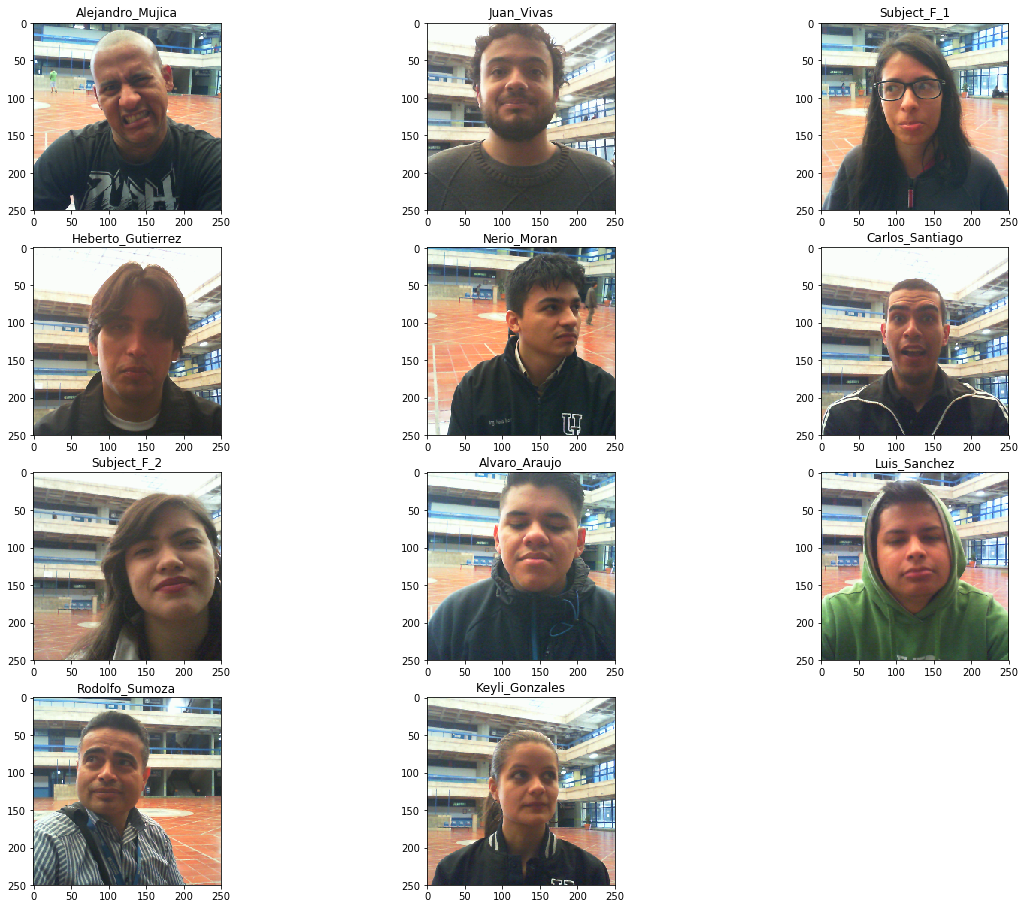

In [4]:
if(len(crop_img_a) > 0):
    l = len(crop_img_a)
    nrows= int(l / 3) +1+ (1 if (l % 3 != 0) else 0);
    ncols=3
    plt.figure(figsize=(20, 20))
    for i, crop in enumerate(crop_img_a):
        disp = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
        plot_number= i +1
        plt.subplot(nrows,ncols,plot_number)
        plt.title(labels[i])
        plt.imshow(disp)
        print(disp.shape)

## Detección de rostros

In [5]:
import dlib

detector = dlib.get_frontal_face_detector()

### Obtener el mejor bounding box del rostro (si lo hay)

In [6]:
bb = []
for i, crop in enumerate(crop_img_a):
    rgbImg = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
    rects = detector(rgbImg, 2)
    if len(rects) > 0:
        bb.append(max(rects, key=lambda rect: rect.width() * rect.height()))
    else:
        print("Not faces for {}".format(labels[i]))
        del labels[i]
        del crop_img_a[i]
        

(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)


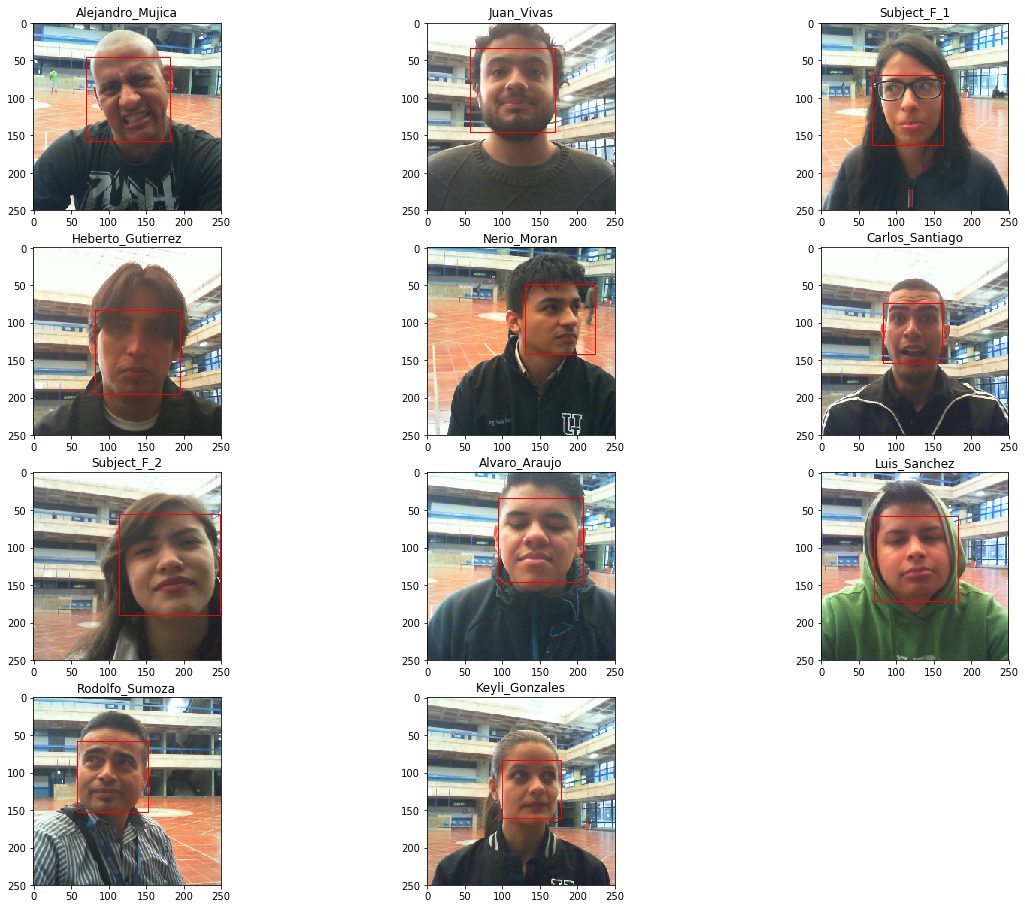

In [7]:
import matplotlib.patches as patches

if(len(crop_img_a) > 0):
    l = len(crop_img_a)
    nrows= int(l / 3) +1+ (1 if (l % 3 != 0) else 0);
    ncols=3
    plt.figure(figsize=(20, 20))
    for i, crop in enumerate(crop_img_a):
        disp = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
        plot_number= i +1
        plt.subplot(nrows,ncols,plot_number)
        plt.title(labels[i])
        plt.imshow(disp)
        plt.gca().add_patch(patches.Rectangle((bb[i].left(), bb[i].top()), bb[i].width(), bb[i].height(), fill=False, color='red'))
        print(disp.shape)

## Buscar 68 landsmarks

In [8]:
predictor = dlib.shape_predictor('models/shape_predictor_68_face_landmarks.dat')
landsmarks = []
if(len(crop_img_a) > 0):
    i = 0;
    for b, crop in zip(bb,crop_img_a):
        rgbImg = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
        points = predictor(crop, b)
        points = list(map(lambda p: (p.x, p.y), points.parts()))
        landsmarks.append(points)
        i += 1;

In [9]:
TEMPLATE = np.float32([
    (0.0792396913815, 0.339223741112), (0.0829219487236, 0.456955367943),
    (0.0967927109165, 0.575648016728), (0.122141515615, 0.691921601066),
    (0.168687863544, 0.800341263616), (0.239789390707, 0.895732504778),
    (0.325662452515, 0.977068762493), (0.422318282013, 1.04329000149),
    (0.531777802068, 1.06080371126), (0.641296298053, 1.03981924107),
    (0.738105872266, 0.972268833998), (0.824444363295, 0.889624082279),
    (0.894792677532, 0.792494155836), (0.939395486253, 0.681546643421),
    (0.96111933829, 0.562238253072), (0.970579841181, 0.441758925744),
    (0.971193274221, 0.322118743967), (0.163846223133, 0.249151738053),
    (0.21780354657, 0.204255863861), (0.291299351124, 0.192367318323),
    (0.367460241458, 0.203582210627), (0.4392945113, 0.233135599851),
    (0.586445962425, 0.228141644834), (0.660152671635, 0.195923841854),
    (0.737466449096, 0.182360984545), (0.813236546239, 0.192828009114),
    (0.8707571886, 0.235293377042), (0.51534533827, 0.31863546193),
    (0.516221448289, 0.396200446263), (0.517118861835, 0.473797687758),
    (0.51816430343, 0.553157797772), (0.433701156035, 0.604054457668),
    (0.475501237769, 0.62076344024), (0.520712933176, 0.634268222208),
    (0.565874114041, 0.618796581487), (0.607054002672, 0.60157671656),
    (0.252418718401, 0.331052263829), (0.298663015648, 0.302646354002),
    (0.355749724218, 0.303020650651), (0.403718978315, 0.33867711083),
    (0.352507175597, 0.349987615384), (0.296791759886, 0.350478978225),
    (0.631326076346, 0.334136672344), (0.679073381078, 0.29645404267),
    (0.73597236153, 0.294721285802), (0.782865376271, 0.321305281656),
    (0.740312274764, 0.341849376713), (0.68499850091, 0.343734332172),
    (0.353167761422, 0.746189164237), (0.414587777921, 0.719053835073),
    (0.477677654595, 0.706835892494), (0.522732900812, 0.717092275768),
    (0.569832064287, 0.705414478982), (0.635195811927, 0.71565572516),
    (0.69951672331, 0.739419187253), (0.639447159575, 0.805236879972),
    (0.576410514055, 0.835436670169), (0.525398405766, 0.841706377792),
    (0.47641545769, 0.837505914975), (0.41379548902, 0.810045601727),
    (0.380084785646, 0.749979603086), (0.477955996282, 0.74513234612),
    (0.523389793327, 0.748924302636), (0.571057789237, 0.74332894691),
    (0.672409137852, 0.744177032192), (0.572539621444, 0.776609286626),
    (0.5240106503, 0.783370783245), (0.477561227414, 0.778476346951)])

TPL_MIN, TPL_MAX = np.min(TEMPLATE, axis=0), np.max(TEMPLATE, axis=0)
MINMAX_TEMPLATE = (TEMPLATE - TPL_MIN) / (TPL_MAX - TPL_MIN)

### Aplicar la transformación para que la cara sea alineada

In [10]:
landmarkIndices = np.array([39, 42, 57]) #INNER_EYES_AND_BOTTOM_LIP
imgDim = 96
aligned_faces = []

if(len(crop_img_a) > 0):
    i = 0;
    for b, landmark,crop in zip(bb,landsmarks,crop_img_a):
        npLandmarks = np.float32(landmark)
        rgbImg = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)

        H = cv2.getAffineTransform(npLandmarks[landmarkIndices],
                           imgDim * MINMAX_TEMPLATE[landmarkIndices])
        thumbnail = cv2.warpAffine(rgbImg, H, (imgDim, imgDim))
        aligned_faces.append(thumbnail)


(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
(96, 96, 3)
(96, 96, 3)


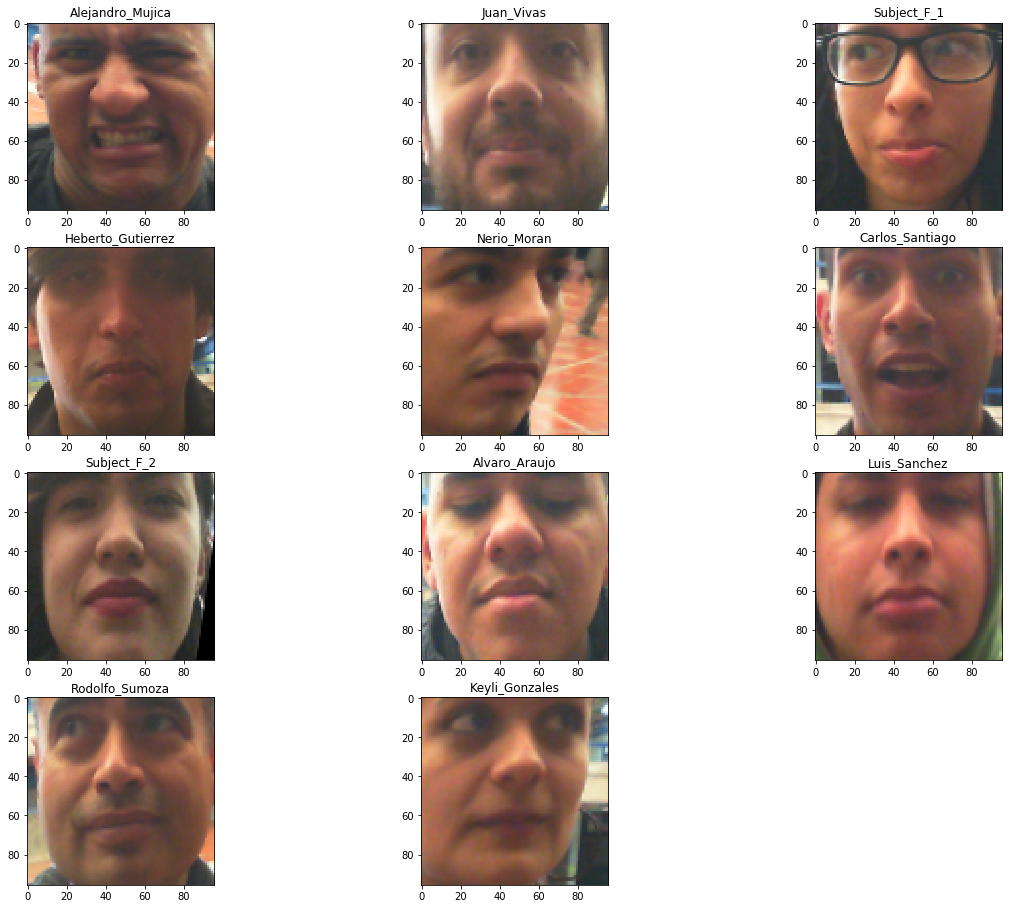

In [11]:
if(len(aligned_faces) > 0):
    l = len(aligned_faces)
    nrows= int(l / 3) +1+ (1 if (l % 3 != 0) else 0);
    ncols=3
    plt.figure(figsize=(20, 20))
    for i, disp in enumerate(aligned_faces):
        plot_number= i +1
        plt.subplot(nrows,ncols,plot_number)
        plt.title(labels[i])
        plt.imshow(disp)
        print(disp.shape)